**Press shift+enter to execute a cell**

In [2]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from copy import copy, deepcopy

#### Download dataset to colab

In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import urllib.request
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", "winequality-red.csv")

('winequality-red.csv', <http.client.HTTPMessage at 0x1e4a0d55850>)

In [4]:
!ls

sample_data  winequality-red.csv


#### Import the data


In [9]:
adata = genfromtxt('winequality-red.csv', delimiter=';')
#normailze data
data=(adata[1:,:]-adata[1:,:].mean())/adata[1:,:].std()
# data=adata[1:,:]
# print(normdata)
variableCount=len(array(data[0,:]))-1
#Extract columns
xtheta=[]
y = array(data[:,variableCount])
for i in range(0,variableCount):
  xtheta.append((data[:,i]))
#print(xtheta)


#### Defining the hyperparamters

In [6]:
#hyperparamters
# learning_rate = 0.0001
learning_rate = 0.1

initial_m = [0]*(variableCount+1)
# print(initial_m)
num_iterations = 50
#print(array(data[1, 0:variableCount-1]))


#### Define cost function

In [7]:
print((data[1, 0:variableCount]))
print((data[1, variableCount]))
print(variableCount)
def compute_cost(ms, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    
    for i in range(0, len(data)):
        xi = array(data[i, 0:variableCount])

        y = data[i, variableCount]
        mx=0
        for index in range(0,len(xi)):
          x=xi[index]
          mx+= (x*ms[index+1])
        
        total_cost += (y - (mx + ms[0])) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

[-0.00786202 -0.43952543 -0.49441905 -0.33223337 -0.48830589  1.06505859
  3.68498102 -0.43223955 -0.29480591 -0.45200125  0.11689619]
-0.18252351837442135
11


#### Define Gradient Descent functions

In [8]:
def step_gradient(ms, data, alpha):
    
    m_gradient = [0]*(variableCount+1)
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        xi = data[i, 0:variableCount]
        y = data[i, variableCount]

        mx=ms[0]
        for index in range(0,len(xi)):
          x=xi[index]
          mx+= (x*ms[index+1])
        ymx=y-mx

        m_gradient[0]+= (-(1/N) * ymx)
        for index in range(0,len(xi)):
          x=xi[index]
          m_gradient[index+1]+= (-(1/N) * x * ymx)
        
    m_updated = [0]*(variableCount+1)
    for index in range(0,len(ms)):
      m=ms[index]
      m_updated[index]= m-alpha*m_gradient[index]

    #Return updated parameters
    return m_updated

def gradient_descent(data, ms, learning_rate, num_iterations):
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    # ms_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(ms, data))
        ms = step_gradient(ms, array(data), learning_rate)
        b_progress.append(ms[0])
        m_progress.append(ms[1:])
        
    return [ ms, cost_graph,b_progress,m_progress]

#### Run gradient_descent() to get optimized parameters b and m

In [9]:
ms, cost_graph,b_progress,m_progress = gradient_descent(data, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized theta values:', ms)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(ms, data))

Optimized theta values: [-0.05683443852450764, 0.0005874955088461611, 0.025226519379391528, 0.027872269105748488, 0.020704032563716918, 0.02770630436233052, 0.007386777962811396, -0.0066732946067380615, 0.024561689445891613, 0.01614656695634387, 0.02647227198071, -0.0023956419650682376]
Minimized cost: 0.0012130179431041456


#### Plotting the cost per iterations

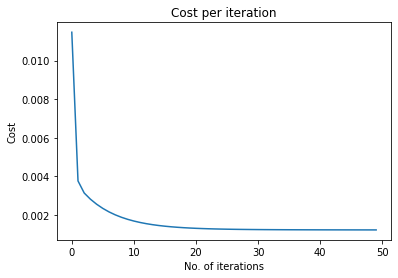

In [10]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [ ]:
#testing predictions
# y=ms[0]
# for i in range(1,len(ms)):
#   y+=(ms[i]*data[215,i-1])
# print(y)